# STOR 120 - Homework 6: Probability, Simulation, Estimation, and Assessing Models

**Reading**: 
* [Randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html) 
* [Sampling and Empirical Distributions](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

For all problems that you must write out explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [42]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Probability


We will be testing some probability concepts that were introduced in lecture. For all of the following problems, we will introduce a problem statement and give you a proposed answer. You must assign the provided variable to one of the following three integers, depending on whether the proposed answer is too low, correct, or too high. 

1. Assign the variable to 1 if you believe our proposed answer is too low.
2. Assign the variable to 2 if you believe our proposed answer is correct.
3. Assign the variable to 3 if you believe our proposed answer is too high.


You are more than welcome to create more cells across this notebook to use for arithmetic operations 

**Question 1.** [Pass the Pigs](https://en.wikipedia.org/wiki/Pass_the_Pigs) is a dice game using asymmetrical throwing dice (shaped like pigs). Each turn involves one player throwing two model pigs, each of which has a dot on one side. The player gains or loses points based on the way the pigs land. Each turn lasts until the player throwing either rolls the pigs in a way that wipes out their current turn score, wipes out their total game score, or decides to stop their turn, add their turn score to their total score and pass the pigs to the next player. The winner is the first player to reach a predetermined total score. When rolling one pig there are six outcomes with the following (approximate) probabilities:

Position       | Probability | Description
---------------|-------------|-------------------------------------------------
Side (no dot)  | 0.3490      | The pig is lying on its side without a dot
Side (dot)     | 0.3020      | The pig is lying on its side with a dot
Razorback      | 0.2240      | The pig is lying on its back
Trotter        | 0.0880      | The pig is standing upright
Snouter        | 0.0300      | The pig is leaning on its snout
Leaning Jowler | 0.0061      | Jowler - The pig is resting on its snout and ear

You roll one pig 10 times. What is the chance of getting 10 Razorbacks?

Our proposed answer: 
$$\left({0.2240}\right)^{10}$$

Assign `ten_razorbackss` to either 1, 2, or 3 depending on if you think our answer is too low, correct, or too high

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [43]:
ten_razorbacks = 2

**Question 2.** Take the same problem set-up as before, rolling one pig 10 times. What is the chance that in your 10 rolls the only positions that you roll are (some combination of) `Side (no dot)` and `Side (dot)`?

Our proposed answer: $$(0.3490)^{10} + (0.3020)^{10}$$

Assign `only_sides` to either 1, 2, or 3. 

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [44]:
only_sides = 1

**Question 3.** Assume we are picking a lottery ticket. We must choose three distinct numbers from 1 to 1000 and write them on a ticket. Next, someone picks three numbers one by one from a bowl with numbers from 1 to 1000 each time without putting the previous number back in. We win if our numbers are all called in order. 

If we decide to play the game and pick our numbers as 12, 140, and 890, what is the chance that we **do not** win? 

Our proposed answer: $$1 - \left(\frac{3}{1000}\right)^3$$

Assign `lottery` to either 1, 2, or 3. 

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [45]:
lottery = 3

**Question 4.** Assume we have two lists, list A and list B. List A contains the numbers [20,10,30], while list B contains the numbers [10,30,20,40,30]. We choose one number from list A randomly and one number from list B randomly. What is the chance that the number we chose from list B is larger than the number we drew from list A?

Our proposed solution: $$2/3$$

Assign `list_chances` to either 1, 2, or 3. 

*Hint: Consider the different possible ways that the items in List B can be greater than items in List A. Try working out your thoughts with a pencil and paper, what do you think the correct solutions will be close to?*

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [46]:
list_chances = 3

## 2. Monkeys Typing Shakespeare
##### (...or at least the string `STOR120!`)

A monkey is banging repeatedly on the keys of a typewriter. Each time, the monkey is equally likely to hit any of the 26 lowercase letters of the English alphabet, 26 uppercase letters of the English alphabet, any number between 0-9 (inclusive), the space bar, and the following punctuation: `.`, `?`, `!` `,`, regardless of what it has hit before. There are no other keys on the keyboard.  

This question is inspired by a mathematical theorem called the [Infinite monkey theorem](<https://en.wikipedia.org/wiki/Infinite_monkey_theorem>), which postulates that if you put a monkey in the situation described above for an infinite time, they will eventually type out all of Shakespeare’s works.

**Question 1.** Suppose the monkey hits the keyboard 8 times.  Compute the chance that the monkey types the sequence `STOR120!`.  (Call this `STOR120_em_chance`.) Use algebra and type in an arithmetic equation that Python can evalute.

<!--
BEGIN QUESTION
name: q2_1
manual: false
-->

In [47]:
STOR120_em_chance = (1 / (26 + 26 + 1 + 10 + 4)) ** 8
STOR120_em_chance

2.4626436805241983e-15

**Question 2.** Write a function called `simulate_key_strike`.  It should take **no arguments**, and it should return a random one-character string that is equally likely to be any of the 26 lower-case English letters, 26 upper-case English letters, any number between 0-9 (inclusive), the space bar, or the following punctuation: `.`, `?`, `!` `,`.

<!--
BEGIN QUESTION
name: q2_2
manual: false
-->

In [48]:
# We have provided the code below to compute a list called keys,
# containing all the lower-case English letters, upper-case English letters, 
# the digits 0-9 (inclusive), blank sapce, and the given punctuation

import string
keys = list(string.ascii_letters + string.digits + ' ' + '.' + '?' + '!' + ',')

def simulate_key_strike():
    """Simulates one random key strike."""
    return np.random.choice(keys)

# An example call to your function:
simulate_key_strike()

'r'

**Question 3.** Write a function called `simulate_several_key_strikes`.  It should take one argument: an integer specifying the number of key strikes to simulate. It should return a string containing that many characters, each one obtained from simulating a key strike by the monkey.

*Hint:* If you make a list or array of the simulated key strikes called `key_strikes_array`, you can convert that to a string by calling `"".join(key_strikes_array)`

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [49]:
def simulate_several_key_strikes(num_strikes):
    key_strikes = ""
    for i in range(0, num_strikes):
        key_strikes += (simulate_key_strike())
    return key_strikes

# An example call to your function:
simulate_several_key_strikes(8)

'BVxUccMc'

**Question 4.** Call `simulate_several_key_strikes` 5000 times, each time simulating the monkey striking 8 keys.  Compute the proportion of times the monkey types `STOR120!`, calling that proportion `data_proportion`.

<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

In [50]:
for i in range(0, 5000):
    count = 0
    if simulate_several_key_strikes(8) == "STOR120!":
        count += 1
data_proportion = count / 5000
data_proportion

0.0

**Question 5.** Check the value your simulation computed for `data_proportion`.  Is your simulation a good way to estimate the chance that the monkey types `"STOR120!"` in 8 strikes (the answer to question 1)?  Why or why not?

<!--
BEGIN QUESTION
name: q2_5
manual: true
-->
<!-- EXPORT TO PDF -->

No, since the possibility of typing out "STOR120!" is very small, and the number of simulation is too little for the simulation to get the case in which the monkey types "STOR120!". 

**Question 6.** Compute the chance that the monkey types  `!` at least once in the 8 strikes.  Call it `em_chance`. Use algebra and type in an arithmetic equation that Python can evalute. 

<!--
BEGIN QUESTION
name: q2_6
manual: false
-->

In [51]:
em_chance = 1 - ((66 / (26 + 26 + 1 + 10 + 4)) ** 8)
em_chance

0.11334827623783217

**Question 7.** Do you think that a computer simulation is more or less effective to estimate `em_chance` compared to when we tried to estimate `STOR120_em_chance` this way? Why or why not? (You don't need to write a simulation, but it is an interesting exercise.)

<!--
BEGIN QUESTION
name: q2_7
manual: true
-->
<!-- EXPORT TO PDF -->

Less effective. Since we need a fairly big amount of simulations to get the possibility, i.e. we need to do a lot of simulation so that the experimental possibility becomes close to the theoretical possibility. 

## 3. Sampling Basketball Players


This exercise uses salary data and game statistics for basketball players from the 2019-2020 NBA season. The data was collected from [Basketball-Reference](http://www.basketball-reference.com).

Run the next cell to load the two datasets.

In [52]:
player_data2 = Table.read_table('player_data2.csv')
salary_data2 = Table.read_table('salary_data2.csv')
player_data2.show(3)
salary_data2.show(3)

Player,3P,2P,PTS
Steven Adams,0,4.4,10.7
Bam Adebayo,0,6.2,15.8
LaMarcus Aldridge,1.2,6.3,19.1


Name,Salary
Stephen Curry,40231758
Chris Paul,38506482
Russell Westbrook,38178000


**Question 1.** We would like to relate players' game statistics to their salaries.  Construct a table called `full_data2` that includes one row for each player who is listed in both `player_data2` and `salary_data2`.  It should include all the columns from `player_data2` and `salary_data2`, except the `"Name"` column.

<!--
BEGIN QUESTION
name: q3_1
manual: false
-->

In [54]:
full_data2 = player_data2.join("Player", salary_data2, "Name")
full_data2

Player,3P,2P,PTS,Salary
Aaron Gordon,1.2,4.1,14.2,19863636
Aaron Holiday,1.5,2.2,9.9,2239200
Abdel Nader,0.7,1.3,5.7,1618520
Admiral Schofield,0.5,0.6,3.2,898310
Al Horford,1.4,3.4,12,28000000
Al-Farouq Aminu,0.5,0.9,4.3,9258000
Alec Burks,1.7,3.3,15.8,2320044
Alen Smailagić,0.3,1.3,4.7,898310
Alex Caruso,0.7,1.2,5.5,2750000
Alex Len,0.4,3.2,8.7,4160000


Basketball teams would like to hire players who perform well but don't command high salaries.  From this perspective, a very crude measure of a player's *value* to their team is the number of 3 pointers and free throws the player scored in a season for every **\$100000 of salary** (*Note*: the `Salary` column is in dollars, not hundreds of thousands of dollars). For example, Al Horford scored an average of 5.2 points for 3 pointers and free throws combined, and has a salary of **\$28 million.** This is equivalent to 280 hundreds of thousands of dollars, so his value is $\frac{5.2}{280}$. The formula is:

$$\frac{\text{"PTS"} - 2 * \text{"2P"}}{\text{"Salary"}\ / \ 100000}$$

**Question 2.** Create a table called `full_data2_with_value` that's a copy of `full_data2`, with an extra column called `"Value"` containing each player's value (according to our crude measure).  Then make a histogram of players' values.  

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->
<!-- EXPORT TO PDF -->

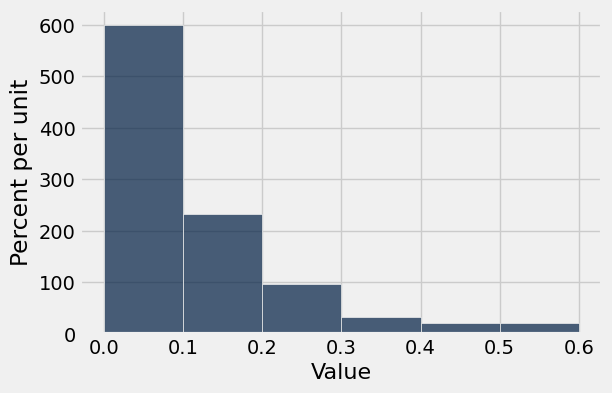

In [53]:
bins = np.arange(0, 0.7, .1) # Use these provided bins when you make your histogram
full_data2_with_value = full_data2.with_column("Value", (full_data2.column("PTS") - 2 * full_data2.column("2P")) / (full_data2.column("Salary") / 100000)) 
full_data2_with_value.hist("Value", bins = bins)

Now suppose we weren't able to find out every player's salary (perhaps it was too costly to interview each player).  Instead, we have gathered a *simple random sample* of 50 players' salaries.  The cell below loads those data.

In [55]:
sample_salary_data2 = Table.read_table("sample_salary_data2.csv")
sample_salary_data2.show(3)

Name,Salary
D.J. Wilson,2961120
Tyler Cook,101504
Abdel Nader,1618520


**Question 3.** Make a histogram of the values of the players in `sample_salary_data2`, using the same method for measuring value we used in question 2. **Use the same bins, too.**  

*Hint:* This will take several steps.

<!--
BEGIN QUESTION
name: q3_3
manual: true
-->
<!-- EXPORT TO PDF -->

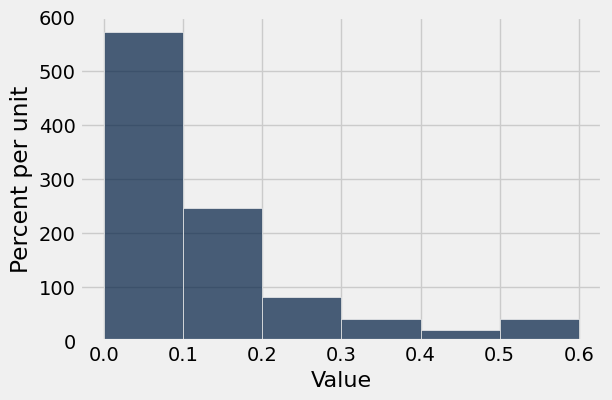

In [56]:
sample_data2 = player_data2.join("Player", sample_salary_data2, "Name")
sample_data2_with_value = sample_data2.with_column("Value", (sample_data2.column("PTS") - 2 * sample_data2.column("2P")) / (sample_data2.column("Salary") / 100000) ) 
sample_data2_with_value.hist("Value", bins = bins)

## 4. Earthquakes


The next cell loads a table containing information about **every earthquake with a magnitude above 5** in 2022 as of September 22nd (smaller earthquakes are generally not felt, only recorded by very sensitive equipment), compiled by the US Geological Survey. (source: https://earthquake.usgs.gov/earthquakes/search/)

In [57]:
earthquakes = Table().read_table('earthquakes_2022.csv').select(['time', 'mag', 'place'])
earthquakes

time,mag,place
2022-09-22T09:07:04.619Z,5.2,"59 km N of Picton, New Zealand"
2022-09-22T06:16:09.611Z,6.8,"Michoacan, Mexico"
2022-09-21T22:24:41.919Z,5,"68 km SSE of Hasaki, Japan"
2022-09-21T17:57:59.244Z,5.1,Turkey-Iran border region
2022-09-21T11:57:51.682Z,5,"198 km WSW of Tual, Indonesia"
2022-09-21T09:30:48.880Z,5.7,"eastern New Guinea region, Papua New Guinea"
2022-09-20T22:25:01.121Z,5,"184 km WSW of Pariaman, Indonesia"
2022-09-20T18:49:18.541Z,5,South Sandwich Islands region
2022-09-20T18:23:42.879Z,6,"254 km ESE of Ust’-Kamchatsk Staryy, Russia"
2022-09-20T08:17:17.023Z,5.8,"9 km SE of La Placita de Morelos, Mexico"


If we were studying all human-detectable 2022 earthquakes (as of 9/22) and had access to the above data, we’d be in good shape - however, if the USGS didn’t publish the full data, we could still learn something about earthquakes from just a smaller subsample. If we gathered our sample correctly, we could use that subsample to get an idea about the distribution of magnitudes (above 5, of course) throughout the year!

In the following lines of code, we take two different samples from the earthquake table, and calculate the mean of the magnitudes of these earthquakes.

In [58]:
sample1 = earthquakes.sort('mag', descending = True).take(np.arange(100))
sample1_magnitude_mean = np.mean(sample1.column('mag'))
sample2 = earthquakes.take(np.arange(100))
sample2_magnitude_mean = np.mean(sample2.column('mag'))
[sample1_magnitude_mean, sample2_magnitude_mean]

[6.3519999999999994, 5.4579999999999993]

**Question 1.**  Are these samples representative of the population of earthquakes in the original table (that is, the should we expect the mean to be close to the population mean)? 

*Hint:* Consider the ordering of the `earthquakes` table. 

<!--
BEGIN QUESTION
name: q4_1
manual: true
-->
<!-- EXPORT TO PDF -->

No. The sample 1 have a descending order of the magnitude of the earthquake so that the mean value will be relatively higher since it is calculating the highest part of the data.

**Question 2.** Write code to produce a sample of size 50 that is representative of the population. Then, take the mean of the magnitudes of the earthquakes in this sample. Assign these to `representative_sample` and `representative_mean` respectively. 

<!--
BEGIN QUESTION
name: q4_2
manual: false
-->

In [60]:
representative_sample = earthquakes.sample(50, with_replacement=False)
representative_mean = np.mean(representative_sample.column("mag"))
representative_mean

5.3700000000000001

**Question 3.** Suppose we want to figure out what the biggest magnitude earthquake was in 2022 (as of 9/22), but we only have our representative sample of 50. Let’s see if trying to find the biggest magnitude in the population from a random sample of 50 is a reasonable idea!

Write code that takes many random samples from the `earthquakes` table and finds the maximum of each sample. You should take a random sample of size 50 and do this 5000 times. Assign the array of maximum magnitudes you find to `maximums`.

<!--
BEGIN QUESTION
name: q4_3
manual: false
-->

In [74]:
maximums = make_array()
for i in np.arange(5000): 
    maximums = np.append(maximums, float(max((earthquakes.sample(50, with_replacement=False)).column("mag"))))
maximums

array([ 6.3,  6.6,  6.9, ...,  6.7,  6.6,  6.8])

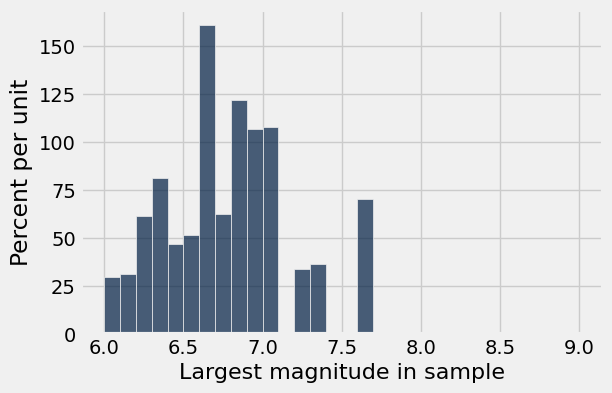

In [75]:
#Histogram of your maximums
Table().with_column('Largest magnitude in sample', maximums).hist('Largest magnitude in sample', bins = np.arange(6, 9.1, 0.1)) 

**Question 4.** Now find the magnitude of the actual strongest earthquake in 2022 (as of 9/22 and not the maximum of a sample). This will help us determine whether a random sample of size 50 is likely to help you determine the largest magnitude earthquake in the population.

<!--
BEGIN QUESTION
name: q4_4
manual: false
-->

In [62]:
strongest_earthquake_magnitude = np.max(earthquakes.column("mag"))
strongest_earthquake_magnitude

7.5999999999999996

**Question 5.** 
Explain whether you believe you can accurately use a sample size of 50 to determine the maximum. What is one problem with using the maximum as your estimator? Use the histogram above to help answer. 

<!--
BEGIN QUESTION
name: q4_5
manual: true
-->
<!-- EXPORT TO PDF -->

I don't believe that we can accurately use a sample size of 50 is enough to determine the maximum. As 50 is a very small sample number and it cannot represent the whole dataset. In addition, the maximum is only one datum in the whole population, so we need a bigger sample size to increase the possibility of including the actual maximum in our sample. From the histogram we can see that the percentage of times that the true maximum data is included is in a very small proportion.

## 5. Assessing Jade's Models
#### Games with Jade

Our friend Jade comes over and asks us to play a game with her. The game works like this: 

> We will draw randomly with replacement from a simplified 24 card deck with 4 types of *good* cards (A, J, Q, K), and 2 types of *bad* cards (9, 10). for each type of card, there are 4 cards in the deck, with one in each suit ("♠︎", "♣︎", "♥︎", or "♦︎"). We draw cards with replacement 24 times, and if the number of *bad* cards is greater than or equal to 8, we lose.
> 
> Otherwise, Jade loses.

We play the game once and we lose, observing 14 total *bad* cards. We are angry and accuse Jade of cheating! Jade is adamant, however, that the deck is fair.

Jade's model claims that there is an equal chance of getting any of the cards (9♠︎, 10♠︎, J♠︎, Q♠︎, K♠︎, A♠︎, 9♣︎, 10♣︎, J♣︎, Q♣︎, K♣︎, A♣︎, 9♥︎, 10♥︎, J♥︎, Q♥︎, K♥︎, A♥︎, 9♦︎, 10♦︎, J♦︎, Q♦︎, K♦︎, A♦︎), but we do not believe her. We believe that the deck is clearly rigged, with *bad* cards (9♠︎, 10♠︎, 9♣︎, 10♣︎, 9♥︎, 10♥︎, 9♦︎, 10♦︎) being more likely than the remaining cards.

#### Question 1
Assign `deck_model_probabilities` to a two-item array containing the chance of drawing a *good* card as the first element, and the chance of drawing a *bad* card as the second element under Jade's model. Since we're working with probabilities, make sure your values are between 0 and 1. 

<!--
BEGIN QUESTION
name: q5_1
manual: false
-->

In [63]:
deck_model_probabilities = make_array(16/24, 8/24)
deck_model_probabilities

array([ 0.66666667,  0.33333333])

**Question 2**

We believe Jade's model is incorrect. In particular, we believe there to be a larger chance of getting a *bad* card. Which of the following statistics can we use during our simulation to test between the model and our alternative? Assign `statistic_choice` to the correct answer. 

1. The actual number of *bad* cards we get in 24 draws
2. The distance (absolute value) between the actual number of *bad* cards in 24 draws and the expected number of *bad* cards in 24 draws (8)
3. The expected number of *bad* cards in 24 draws (8)


<!--
BEGIN QUESTION
name: q5_2
manual: false
-->

In [64]:
statistic_choice = 2
statistic_choice

2

#### Question 3

Define the function `deck_simulation_and_statistic`, which, given a sample size and an array of model proportions (like the one you created in Question 1), returns the number of *bad* cards in one simulation of drawing a card under the model specified in `model_proportions`. 

*Hint:* Think about how you can use the function `sample_proportions`. 

<!--
BEGIN QUESTION
name: q5_3
manual: false
-->

In [71]:
def deck_simulation_and_statistic(sample_size, model_proportions):
    simulation_proportion = sample_proportions(sample_size, model_proportions)
    return simulation_proportion[1] * sample_size

deck_simulation_and_statistic(24, deck_model_probabilities)

9.0

**Question 4** 

Use your function from above to simulate the drawing of 24 cards 5000 times under the proportions that you specified in Question 1. Keep track of all of your statistics in `deck_statistics`. 

<!--
BEGIN QUESTION
name: q5_4
manual: false
-->

In [66]:
repetitions = 5000
deck_statistics = make_array()
for i in np.arange(repetitions):
    deck_statistics = np.append(deck_statistics, deck_simulation_and_statistic(24, deck_model_probabilities))

deck_statistics

array([ 13.,   9.,  10., ...,  10.,   8.,   7.])

Let’s take a look at the distribution of simulated statistics.

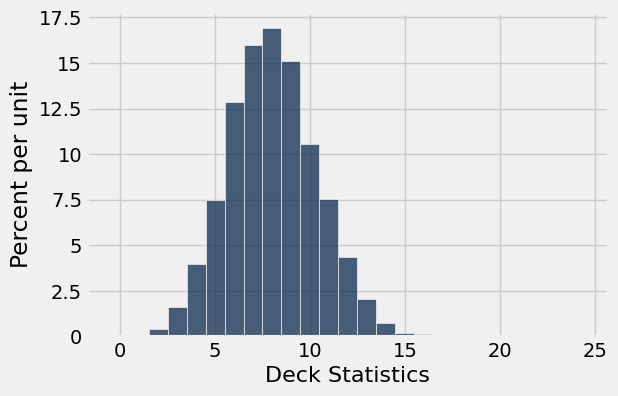

In [67]:
#Draw a distribution of statistics 
Table().with_column('Deck Statistics', deck_statistics).hist(bins = np.arange(-0.5, 25, 1))

#### Question 5
Given your observed value, do you believe that Jade's model is reasonable, or is our alternative more likely? Explain your answer using the distribution drawn in the previous problem. 

<!--
BEGIN QUESTION
name: q5_5
manual: true
-->
<!-- EXPORT TO PDF -->

I believe that Jade's model is reasonable since the distribution shown in the histogram is centered around 8, which indicates the fact that her model is fair enough.